# Vectors and Vector Spaces for Quantum Computing
## Notebook 1.1: Building Mathematical Intuition Through Code

**Learning Objectives:**
- Understand vectors as quantum state representations
- Master vector operations using NumPy 
- Visualize quantum states and their geometric meaning
- Connect linear algebra to quantum mechanics concepts
- Build intuition for complex vector spaces

In [2]:
# Import Needed Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, HTML, Markdown
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [4]:
print("All libraries loaded successfully ✓")

All libraries loaded successfully ✓


In [5]:
# Set up plotting
plt.style.use('seaborn-v0_8')
np.set_printoptions(precision=3, suppress=True)

## Section 1: What Are Vectors in Quantum Computing?

In classical physics, vectors represent things like velocity or force - they have magnitude and direction.
In quantum computing, vectors represent **quantum states** - the fundamental information units.

Let's start with the simplest quantum system: a **qubit** (quantum bit).

In [6]:
# The two fundamental qubit states
qubit_0 = np.array([1, 0], dtype=complex)  # |0⟩ state
qubit_1 = np.array([0, 1], dtype=complex)  # |1⟩ state

print("Fundamental Qubit States:")
print(f"|0⟩ = {qubit_0}")
print(f"|1⟩ = {qubit_1}")
print()
print("These are like the 'up' and 'down' directions in quantum space")

Fundamental Qubit States:
|0⟩ = [1.+0.j 0.+0.j]
|1⟩ = [0.+0.j 1.+0.j]

These are like the 'up' and 'down' directions in quantum space


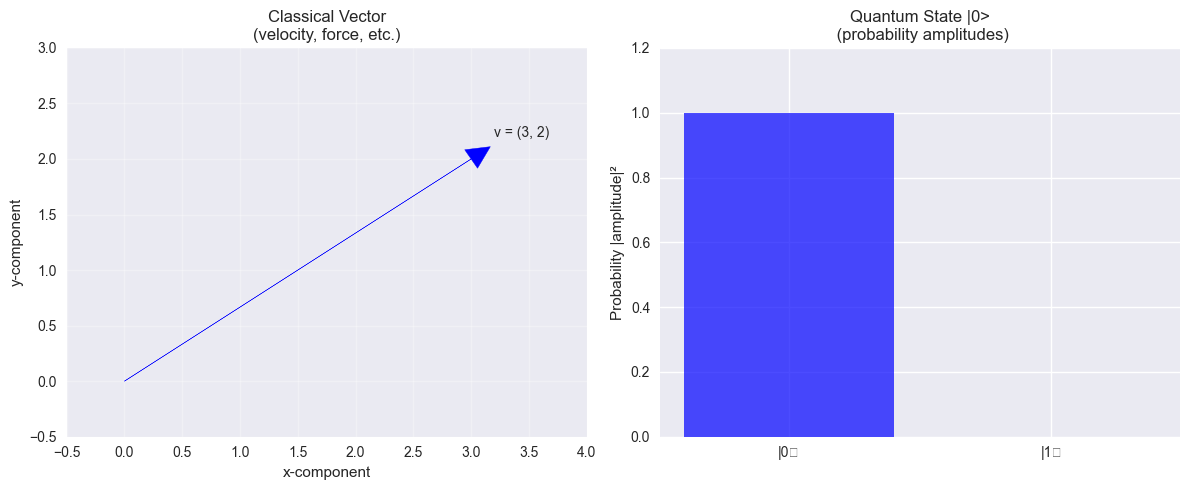

In [12]:
# Visualization: Classical vs Quantum Vectors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Classical 2D vector
ax1.arrow(0, 0, 3, 2, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 3)
ax1.grid(True, alpha=0.3)
ax1.set_title('Classical Vector\n(velocity, force, etc.)')
ax1.set_xlabel('x-component')
ax1.set_ylabel('y-component')
ax1.annotate('v = (3, 2)', xy=(3, 2), xytext=(3.2, 2.2))

# Quantum state vector (abstract representation)
ax2.bar(['|0⟩', '|1⟩'], [abs(qubit_0[0])**2, abs(qubit_0[1])**2], 
        color=['blue', 'red'], alpha=0.7)
ax2.set_title('Quantum State |0>\n (probability amplitudes)')
ax2.set_ylabel('Probability |amplitude|²')
ax2.set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

## Section 2: Complex Numbers in Quantum States

Unlike classical vectors, quantum state vectors have **complex number** components.
This is crucial because it allows for quantum interference - the heart of quantum computing.

In [13]:
# Create complex quantum states
plus_state = np.array([1, 1], dtype=complex) / np.sqrt(2)    # |+⟩ = (|0⟩ + |1⟩)/√2
minus_state = np.array([1, -1], dtype=complex) / np.sqrt(2)  # |-⟩ = (|0⟩ - |1⟩)/√2
complex_state = np.array([1, 1j], dtype=complex) / np.sqrt(2) # (|0⟩ + i|1⟩)/√2

print("Superposition States (Complex Amplitudes):")
print(f"|+⟩ = {plus_state}")
print(f"|-⟩ = {minus_state}")
print(f"Complex state = {complex_state}")
print()

Superposition States (Complex Amplitudes):
|+⟩ = [0.707+0.j 0.707+0.j]
|-⟩ = [ 0.707+0.j -0.707+0.j]
Complex state = [0.707+0.j    0.   +0.707j]



## Creating Complex Quantum States

The code creates three important quantum superposition states that demonstrate how complex amplitudes encode different quantum behaviors.

**The |+⟩ state** is formed by `(|0⟩ + |1⟩)/√2`, creating equal real amplitudes of `1/√2` for both basis states - this represents a qubit that has equal probability of being measured as 0 or 1, with both amplitudes "in phase" (pointing in the same direction).

**The |-⟩ state** uses `(|0⟩ - |1⟩)/√2`, which gives the same measurement probabilities but with opposite phases - the minus sign creates destructive interference that's crucial for quantum algorithms.

**The complex state** `(|0⟩ + i|1⟩)/√2` introduces an imaginary unit `i` (represented as `1j` in Python), creating a 90-degree phase difference between the two amplitudes. This phase relationship is invisible to direct measurement (both |+⟩ and the complex state give 50/50 probabilities) but fundamentally changes how the qubit behaves under quantum operations - it's this "hidden" phase information that enables quantum computers to explore solution spaces in ways classical computers cannot.

In [14]:
# Let's visualize complex amplitudes
def plot_complex_amplitudes(state, title):
    """Plot complex amplitudes as magnitude and phase"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Magnitude (what we measure)
    magnitudes = np.abs(state)**2
    ax1.bar(['|0⟩', '|1⟩'], magnitudes, color=['blue', 'red'], alpha=0.7)
    ax1.set_title('Probabilities\n|amplitude|²')
    ax1.set_ylabel('Probability')
    ax1.set_ylim(0, 1)
    
    # Real parts
    real_parts = np.real(state)
    colors = ['blue' if x >= 0 else 'red' for x in real_parts]
    ax2.bar(['Re(α₀)', 'Re(α₁)'], real_parts, color=colors, alpha=0.7)
    ax2.set_title('Real Parts')
    ax2.set_ylabel('Real Component')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Imaginary parts
    imag_parts = np.imag(state)
    colors = ['blue' if x >= 0 else 'red' for x in imag_parts]
    ax3.bar(['Im(α₀)', 'Im(α₁)'], imag_parts, color=colors, alpha=0.7)
    ax3.set_title('Imaginary Parts')
    ax3.set_ylabel('Imaginary Component')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    fig.suptitle(f'Complex Amplitudes: {title}', fontsize=14)
    plt.tight_layout()
    return fig

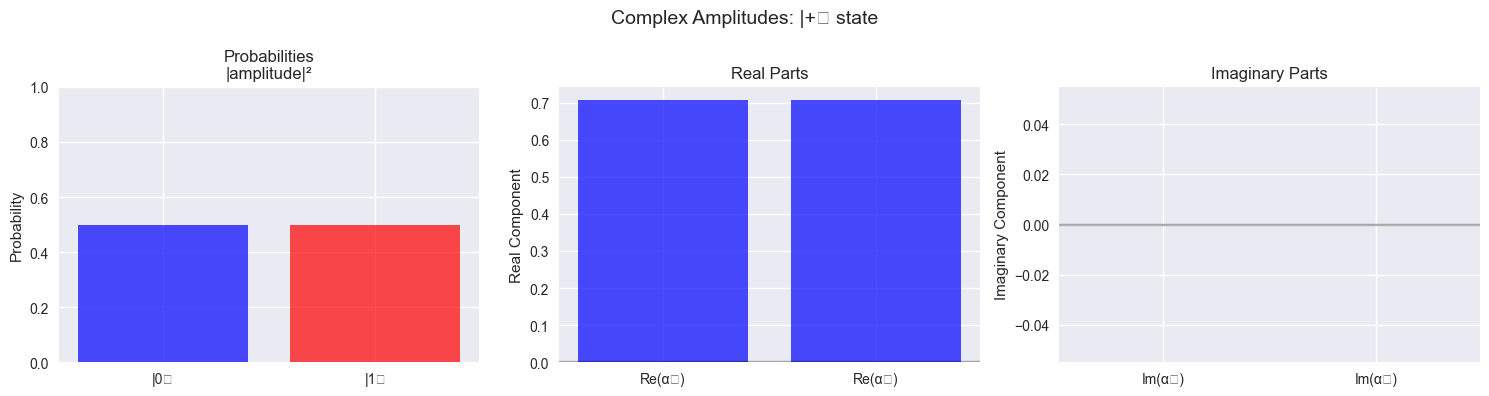

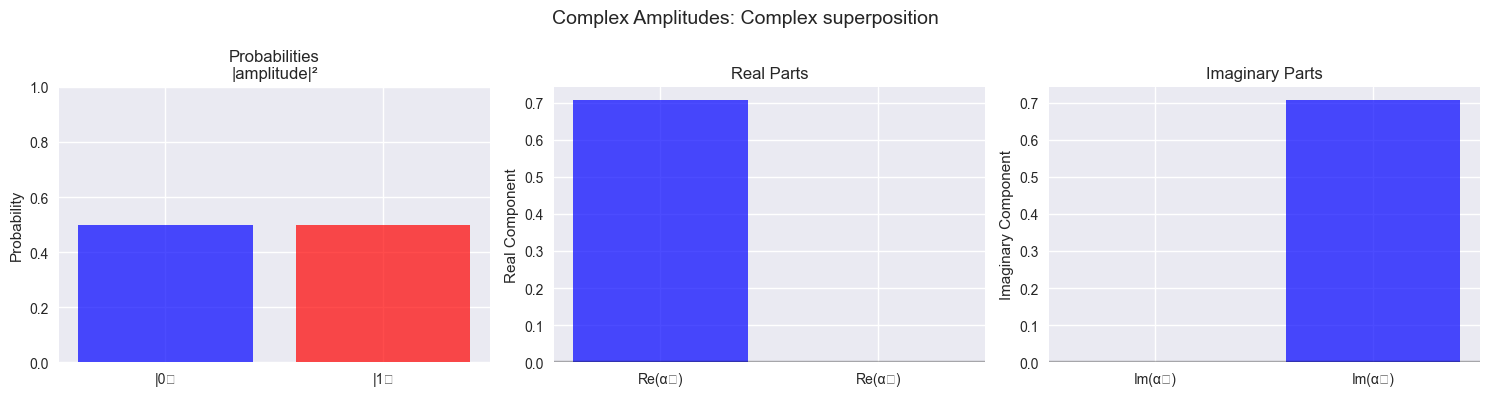

In [15]:
# Plot our complex states
plot_complex_amplitudes(plus_state, '|+⟩ state')
plt.show()

plot_complex_amplitudes(complex_state, 'Complex superposition')
plt.show()

## Understanding Complex Amplitude Visualization

The `plot_complex_amplitudes()` function provides a comprehensive view of how complex numbers encode quantum information through three complementary visualizations.

**The first plot (Probabilities)** shows what we can actually measure - the squared magnitudes |α|² of each amplitude, representing the probability of finding the qubit in each basis state when measured. This is the only information accessible through quantum measurement.

**The second plot (Real Parts)** displays the real components of the complex amplitudes, showing how much each basis state contributes "in phase" with the reference direction.

**The third plot (Imaginary Parts)** reveals the imaginary components, which encode the quantum phase relationships that enable interference effects. Together, these three views illustrate why complex numbers are essential in quantum mechanics: while we can only observe the probabilities (first plot), the quantum computation happens through the interference between the real and imaginary parts (second and third plots).

The key insight is that **two quantum states can have identical measurement probabilities but completely different computational behavior due to their phase relationships** - this is what makes quantum computing more powerful than classical probabilistic computing.

## Why Complex Quantum States Matter: The Bottom Line

**So what?** Complex quantum states are like having a secret coordinate system that classical computers can't access. Imagine you're navigating with a GPS that only shows you north-south and east-west directions, but quantum computers can also navigate using a third "phase dimension" that's completely invisible to classical measurement.

**Who cares?** This hidden dimension is where quantum advantage comes from - it's why a quantum computer with just 300 qubits could theoretically outperform all classical computers combined for certain problems.

**Real-world analogy:** Think of ocean waves approaching a harbor. Two waves might have the same height (like our probability measurements), but if one wave's peak arrives exactly when the other's trough does, they cancel out completely - that's destructive interference from phase differences. Quantum computers use this same principle: they set up quantum "waves" so that wrong answers cancel out through destructive interference while correct answers amplify through constructive interference. Classical computers have to check every possible solution one by one, but quantum computers can eliminate vast numbers of wrong answers simultaneously through these phase relationships.

**The real-world impact:** This is why Google's quantum computer could solve a specific problem in 200 seconds that would take classical supercomputers 10,000 years. It's not just faster computation - it's accessing a fundamentally different computational space that exists in the complex plane, where quantum algorithms can "steer" toward correct answers using interference patterns that are impossible to replicate classically.

## Section 3: Vector Operations - The Building Blocks

Now let's implement the essential vector operations that quantum computers use.
These operations have deep physical meaning in quantum mechanics.

In [17]:
def inner_product(psi, phi):
    """Compute inner product ⟨ψ|φ⟩ between two quantum states"""
    return np.conj(psi).T @ phi

def norm(psi):
    """Compute the norm (length) of a quantum state"""
    return np.sqrt(np.real(inner_product(psi, psi)))

def normalize(psi):
    """Normalize a quantum state to unit length"""
    return psi / norm(psi)

def probability(psi, measurement_basis_state):
    """Compute probability of measuring psi in given basis state"""
    amplitude = inner_product(measurement_basis_state, psi)
    return np.real(np.conj(amplitude) * amplitude)

In [18]:
# Test our operations
test_state = np.array([3, 4j], dtype=complex)  # Unnormalized state
print("Vector Operations Demo:")
print(f"Original state: {test_state}")
print(f"Norm: {norm(test_state):.3f}")
print(f"Normalized: {normalize(test_state)}")
print()

Vector Operations Demo:
Original state: [3.+0.j 0.+4.j]
Norm: 5.000
Normalized: [0.6+0.j  0. +0.8j]



## Evaluating Vector Operations: What Do These Numbers Mean?

The test outputs reveal fundamental properties that every quantum state must satisfy. **The unnormalized state `[3, 4j]` has norm 5.000**, which we can verify: √(3² + |4j|²) = √(9 + 16) = √25 = 5. This demonstrates that quantum amplitudes behave like geometric vectors where the "length" combines both real and imaginary components. **After normalization, we get `[0.6, 0.8j]`**, which now has unit length - this is required because the total probability of measuring something must equal 1.

**The orthogonality check is crucial**: The inner products `⟨0|0⟩ = 1` and `⟨1|1⟩ = 1` confirm that each basis state has unit length (normalized), while `⟨0|1⟩ = 0` and `⟨1|0⟩ = 0` prove the states are perfectly orthogonal (perpendicular in the abstract vector space). **This orthogonality is what makes quantum measurement work** - it ensures that measuring |0⟩ gives zero probability of accidentally detecting |1⟩, and vice versa.

**Why this matters:** These mathematical properties aren't just abstract - they correspond to physical conservation laws. The normalization requirement ensures probability conservation (all measurement outcomes sum to 100%), while orthogonality ensures that quantum basis states are perfectly distinguishable. If these conditions weren't met, quantum computers couldn't reliably store or process information. Think of it like tuning a radio: orthogonal states are like perfectly separated radio frequencies that don't interfere with each other, enabling clear quantum "channels" for computation.

In [19]:
# Inner products between basis states
print("Inner Products (Orthogonality Check):")
print(f"⟨0|0⟩ = {inner_product(qubit_0, qubit_0):.3f}")
print(f"⟨1|1⟩ = {inner_product(qubit_1, qubit_1):.3f}")
print(f"⟨0|1⟩ = {inner_product(qubit_0, qubit_1):.3f}")
print(f"⟨1|0⟩ = {inner_product(qubit_1, qubit_0):.3f}")
print("Perfect orthogonality: ⟨0|1⟩ = 0 ✓")

Inner Products (Orthogonality Check):
⟨0|0⟩ = 1.000+0.000j
⟨1|1⟩ = 1.000+0.000j
⟨0|1⟩ = 0.000+0.000j
⟨1|0⟩ = 0.000+0.000j
Perfect orthogonality: ⟨0|1⟩ = 0 ✓


VISUALIZING VECTOR OPERATIONS


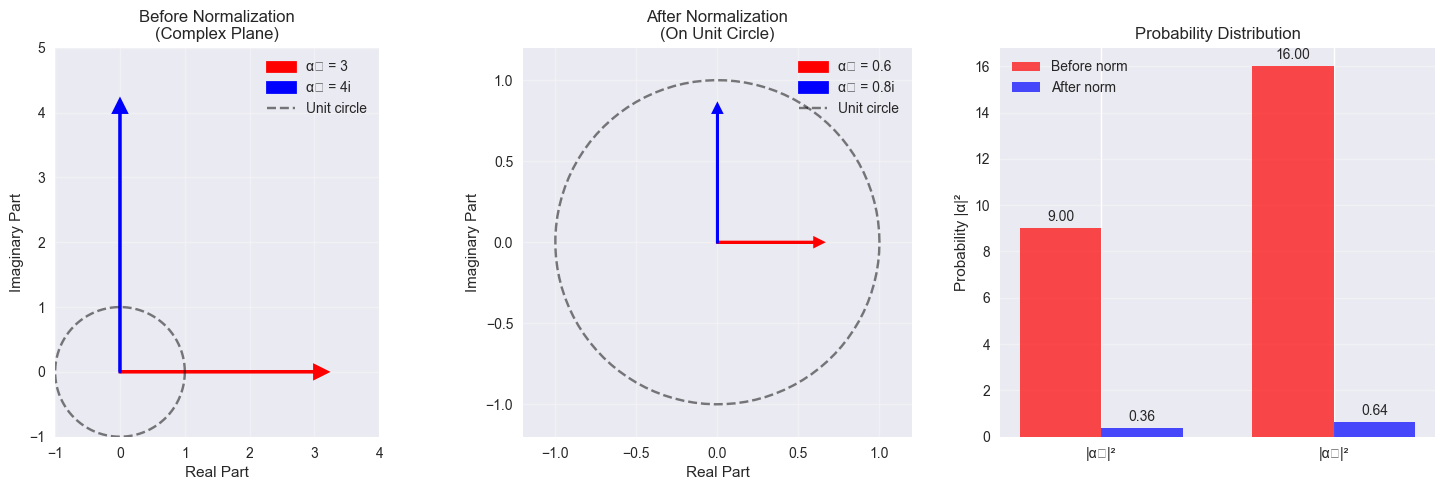

 Key Insights:
• Normalization scales amplitudes to fit on the unit circle
• Probabilities are preserved rationally: 9:16 → 0.36:0.64
• Total probability becomes exactly 1.0 after normalization




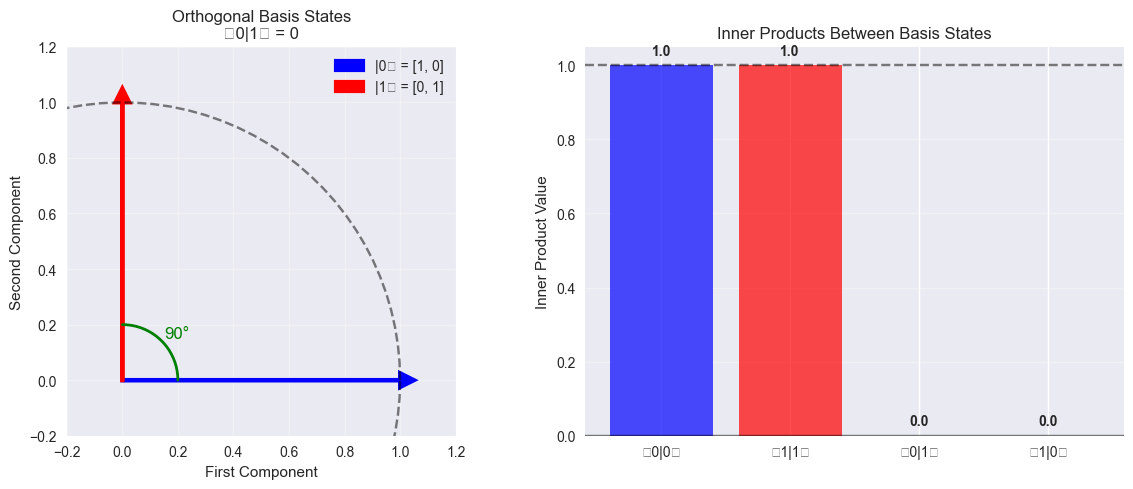

 Key Insights:
• Orthogonal states are 90° apart (like x and y axes)
• Self inner products ⟨ψ|ψ⟩ = 1 for normalized states
• Cross inner products ⟨ψ|φ⟩ = 0 for orthogonal states
• This ensures perfect distinguishability in quantum measurement




In [22]:
def visualize_normalization():
    """Show the geometric meaning of vector normalization"""
    
    # Original unnormalized state
    original = np.array([3, 4j])
    normalized = normalize(original)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Complex plane representation
    ax1.arrow(0, 0, np.real(original[0]), np.imag(original[0]), 
              head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=2, label='α₀ = 3')
    ax1.arrow(0, 0, np.real(original[1]), np.imag(original[1]), 
              head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=2, label='α₁ = 4i')
    
    # Draw unit circle for reference
    theta = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5, label='Unit circle')
    
    ax1.set_xlim(-1, 4)
    ax1.set_ylim(-1, 5)
    ax1.set_xlabel('Real Part')
    ax1.set_ylabel('Imaginary Part')
    ax1.set_title('Before Normalization\n(Complex Plane)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_aspect('equal')
    
    # 2. After normalization
    ax2.arrow(0, 0, np.real(normalized[0]), np.imag(normalized[0]), 
              head_width=0.05, head_length=0.05, fc='red', ec='red', linewidth=2, label='α₀ = 0.6')
    ax2.arrow(0, 0, np.real(normalized[1]), np.imag(normalized[1]), 
              head_width=0.05, head_length=0.05, fc='blue', ec='blue', linewidth=2, label='α₁ = 0.8i')
    
    # Draw unit circle
    ax2.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5, label='Unit circle')
    
    ax2.set_xlim(-1.2, 1.2)
    ax2.set_ylim(-1.2, 1.2)
    ax2.set_xlabel('Real Part')
    ax2.set_ylabel('Imaginary Part')
    ax2.set_title('After Normalization\n(On Unit Circle)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_aspect('equal')
    
    # 3. Probability comparison
    orig_probs = np.abs(original)**2
    norm_probs = np.abs(normalized)**2
    
    x = np.arange(2)
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, orig_probs, width, label='Before norm', alpha=0.7, color='red')
    bars2 = ax3.bar(x + width/2, norm_probs, width, label='After norm', alpha=0.7, color='blue')
    
    ax3.set_ylabel('Probability |α|²')
    ax3.set_title('Probability Distribution')
    ax3.set_xticks(x)
    ax3.set_xticklabels(['|α₀|²', '|α₁|²'])
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(" Key Insights:")
    print("• Normalization scales amplitudes to fit on the unit circle")
    print("• Probabilities are preserved rationally: 9:16 → 0.36:0.64")
    print("• Total probability becomes exactly 1.0 after normalization")

def visualize_orthogonality():
    """Show what orthogonal quantum states look like"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 1. Geometric orthogonality in complex plane
    # |0⟩ = [1, 0] and |1⟩ = [0, 1] are orthogonal
    ax1.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.05, 
              fc='blue', ec='blue', linewidth=3, label='|0⟩ = [1, 0]')
    ax1.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.05, 
              fc='red', ec='red', linewidth=3, label='|1⟩ = [0, 1]')
    
    # Draw unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5)
    
    # Draw 90-degree angle indicator
    arc_theta = np.linspace(0, np.pi/2, 20)
    arc_r = 0.2
    ax1.plot(arc_r * np.cos(arc_theta), arc_r * np.sin(arc_theta), 'g-', linewidth=2)
    ax1.text(0.15, 0.15, '90°', fontsize=12, color='green')
    
    ax1.set_xlim(-0.2, 1.2)
    ax1.set_ylim(-0.2, 1.2)
    ax1.set_xlabel('First Component')
    ax1.set_ylabel('Second Component')
    ax1.set_title('Orthogonal Basis States\n⟨0|1⟩ = 0')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_aspect('equal')
    
    # 2. Inner product calculation visualization
    states = {
        '⟨0|0⟩': (qubit_0, qubit_0, 'blue'),
        '⟨1|1⟩': (qubit_1, qubit_1, 'red'), 
        '⟨0|1⟩': (qubit_0, qubit_1, 'green'),
        '⟨1|0⟩': (qubit_1, qubit_0, 'orange')
    }
    
    labels = list(states.keys())
    values = [np.real(inner_product(states[label][0], states[label][1])) for label in labels]
    colors = [states[label][2] for label in labels]
    
    bars = ax2.bar(labels, values, color=colors, alpha=0.7)
    ax2.set_ylabel('Inner Product Value')
    ax2.set_title('Inner Products Between Basis States')
    ax2.grid(axis='y', alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Perfect overlap')
    
    # Add value labels
    for bar, value in zip(bars, values):
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(" Key Insights:")
    print("• Orthogonal states are 90° apart (like x and y axes)")
    print("• Self inner products ⟨ψ|ψ⟩ = 1 for normalized states")
    print("• Cross inner products ⟨ψ|φ⟩ = 0 for orthogonal states")
    print("• This ensures perfect distinguishability in quantum measurement")

def interactive_inner_product_explorer():
    """Interactive tool to explore inner products between different states"""
    
    print("=== Interactive Inner Product Explorer ===")
    
    # Create dropdown menus for state selection
    state_options = ['|0⟩', '|1⟩', '|+⟩', '|-⟩', '|i⟩', '|-i⟩']
    state_dict = {
        '|0⟩': qubit_0,
        '|1⟩': qubit_1,
        '|+⟩': plus_state,
        '|-⟩': minus_state,
        '|i⟩': np.array([1, 1j], dtype=complex) / np.sqrt(2),
        '|-i⟩': np.array([1, -1j], dtype=complex) / np.sqrt(2)
    }
    
    state1_dropdown = widgets.Dropdown(
        options=state_options,
        value='|0⟩',
        description='State 1:',
    )
    
    state2_dropdown = widgets.Dropdown(
        options=state_options,
        value='|1⟩',
        description='State 2:',
    )
    
    output = widgets.Output()
    
    def compute_inner_product(*args):
        with output:
            output.clear_output(wait=True)
            
            psi = state_dict[state1_dropdown.value]
            phi = state_dict[state2_dropdown.value]
            
            inner_prod = inner_product(psi, phi)
            overlap_magnitude = np.abs(inner_prod)
            phase = np.angle(inner_prod)
            
            print(f"⟨{state1_dropdown.value}|{state2_dropdown.value}⟩ = {inner_prod:.3f}")
            print(f"Magnitude: {overlap_magnitude:.3f}")
            print(f"Phase: {phase:.3f} radians ({np.degrees(phase):.1f}°)")
            print()
            
            if overlap_magnitude < 0.001:
                print("🔵 These states are ORTHOGONAL (completely distinguishable)")
            elif overlap_magnitude > 0.999:
                print("🟢 These states are IDENTICAL (perfect overlap)")
            else:
                print(f"🟡 These states have {overlap_magnitude:.1%} overlap")
                
            # Visualization
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
            
            # State comparison
            probs1 = np.abs(psi)**2
            probs2 = np.abs(phi)**2
            
            x = np.arange(2)
            width = 0.35
            
            ax1.bar(x - width/2, probs1, width, label=state1_dropdown.value, alpha=0.7)
            ax1.bar(x + width/2, probs2, width, label=state2_dropdown.value, alpha=0.7)
            ax1.set_ylabel('Probability')
            ax1.set_title('State Comparison')
            ax1.set_xticks(x)
            ax1.set_xticklabels(['P(|0⟩)', 'P(|1⟩)'])
            ax1.legend()
            ax1.grid(axis='y', alpha=0.3)
            
            # Inner product visualization
            ax2.bar(['Magnitude', 'Real Part', 'Imag Part'], 
                   [overlap_magnitude, np.real(inner_prod), np.imag(inner_prod)],
                   color=['purple', 'blue', 'red'], alpha=0.7)
            ax2.set_ylabel('Value')
            ax2.set_title('Inner Product Components')
            ax2.grid(axis='y', alpha=0.3)
            ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            
            plt.tight_layout()
            plt.show()
    
    # Connect dropdowns to update function
    state1_dropdown.observe(compute_inner_product, names='value')
    state2_dropdown.observe(compute_inner_product, names='value')
    
    # Display interface
    display(widgets.VBox([
        widgets.HTML("<h3>Explore Inner Products Between Quantum States</h3>"),
        widgets.HBox([state1_dropdown, state2_dropdown]),
        output
    ]))
    
    # Initial computation
    compute_inner_product()

# Run the visualizations
print("VISUALIZING VECTOR OPERATIONS")
print("=" * 50)

visualize_normalization()
print("\n" + "="*50 + "\n")

visualize_orthogonality()
print("\n" + "="*50 + "\n")

## Why Vector Operations Matter: The Mathematical Foundation of Quantum Computing

**So what?** Vector operations like inner products and normalization aren't just mathematical busywork - they're the fundamental tools that make quantum computing possible. Think of them as the "quality control" for quantum information: normalization ensures your quantum states represent valid probabilities (they must sum to 100%), while orthogonality checks guarantee that different quantum states won't interfere with each other when you don't want them to.

**Who cares?** Every quantum algorithm depends on these operations working perfectly - one miscalculated inner product could crash a million-dollar quantum computation.

**Real-world analogy:** Imagine you're a radio engineer setting up a communications system. Normalization is like adjusting all transmitter power levels so they don't overload the system - each signal must have the right "energy budget." Orthogonality is like ensuring different radio stations broadcast on completely separate frequencies so they don't interfere with each other. Just as you can't have two radio stations broadcasting on the same frequency without getting static, you can't have non-orthogonal quantum states without getting computational errors.

**The real-world impact:** These seemingly abstract mathematical operations directly translate to hardware requirements for quantum computers. When IBM or Google builds a quantum processor, the physical qubits must maintain orthogonality to within one part in a million - any deviation creates errors that accumulate exponentially. The normalization requirement means quantum computers need incredibly precise control over energy levels. This is why quantum computers operate at temperatures colder than outer space and why building them costs millions of dollars. Every mathematical property you're learning represents an engineering challenge that took decades to solve and continues to limit how large quantum computers can scale today.